<a href="https://colab.research.google.com/github/Nabarundutta/Machine-Learning/blob/main/mnist_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [7]:
X_train[0].shape

(28, 28)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

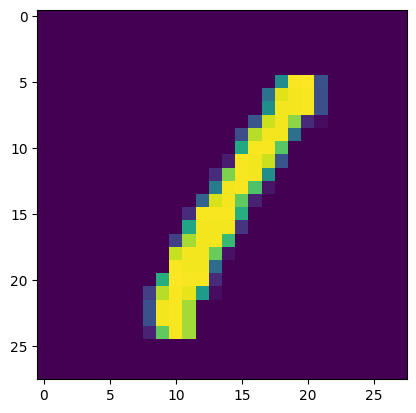

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

In [11]:
X_train = X_train/255
X_test = X_test/255

In [32]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9876 - loss: 0.0391 - val_accuracy: 0.9717 - val_loss: 0.1046
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9900 - loss: 0.0301 - val_accuracy: 0.9737 - val_loss: 0.1022
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9922 - loss: 0.0237 - val_accuracy: 0.9649 - val_loss: 0.1375
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9722 - val_loss: 0.1070
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9932 - loss: 0.0193 - val_accuracy: 0.9759 - val_loss: 0.1031
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9751 - val_loss: 0.1090
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9938 - loss: 0.0170 - val_accuracy: 0.9764 - val_loss: 0.1083
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9965 - loss: 0.01

In [38]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
y_pred = y_prob.argmax(axis=1)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.976

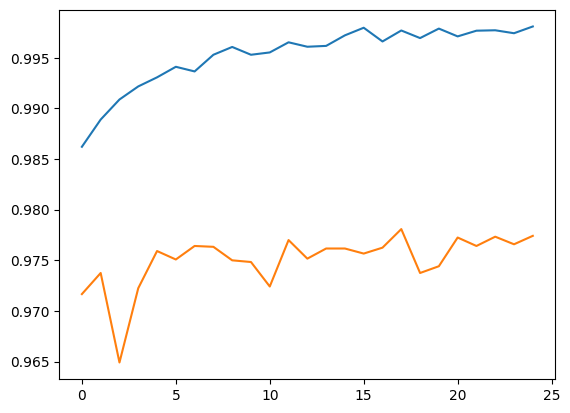

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])